### Лабораторная работа №1 (расчёт вероятностей при подкидывании монетки)

Класс монетка

In [105]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

class Coin:
    def __init__(self, tosses=100, randomSeed=None):
        self.tosses = tosses
        if randomSeed is not None:
            random.seed(randomSeed)
    
    def experiment(self, probability=0.5):
        results = []
        for _ in range(self.tosses):
            randNum = random.random()
            if randNum < probability:
                results.append(1)
            else:
                results.append(0)
        return results
    
    def multipleExperiments(self, experimentsCount=10000, probability=0.5):
        results = []
        for _ in range(experimentsCount):
            tosses = self.experiment(probability=probability)
            results.append(tosses)
        return results
    
    def findSeries(self, tosses, seriesLength=5):
        maxSeries = 0
        currentSeries = 0
        
        for result in tosses:
            if result == 1: 
                currentSeries += 1
                if currentSeries > maxSeries:
                    maxSeries = currentSeries
            else: 
                currentSeries = 0
        
        hasSeries = maxSeries >= seriesLength
        return hasSeries, maxSeries
    
def countCondition(numbers, conditionFunc):
    count = 0
    for num in numbers:
        if conditionFunc(num):
            count += 1
    return count

#### 1) Подсчёт вероятности выпадения орла (приблизительно 50.0%)

In [106]:
generalCoin = Coin(tosses=100, randomSeed=None)

experimentsCount = 1000
experiments = generalCoin.multipleExperiments(experimentsCount, probability=0.5)   
headSums = []
for exp in experiments:
    headSums.append(sum(exp))
headsProbability = np.mean(headSums)
print(f"Средняя вероятность выпадения орлов: {headsProbability:.2f}%")

Средняя вероятность выпадения орлов: 50.08%


#### 2) Подсчёт вероятности выпадения >60 орлов

In [107]:
countMoreThan60 = countCondition(headSums, lambda x: x > 60)
probMoreThan60 = countMoreThan60 * 100/ experimentsCount
print(f"2) Вероятность получить >60 орлов: {probMoreThan60:.2f}%")

2) Вероятность получить >60 орлов: 1.90%


#### 3) Подсчёт вероятности для интервалов [0, 10), [10, 20),..., (90, 100]

In [108]:
intervalSums = [0] * 10
intervalProbabilities = []
intervals = [(i, i+10) for i in range(0, 100, 10)]
for exp in experiments:
    for i, (start, end) in enumerate(intervals):
        if end != 100:
            intervalSums[i] += sum(exp[start:end])
        else:
            intervalSums[i] += sum(exp[start+1:end+1])

for i, (start, end) in enumerate(intervals):
    intervalProbabilities.append(intervalSums[i]/ float(sum(headSums)) )    
    print(f"   [{start:2d}, {end:2d}): {intervalProbabilities[i]:.2f}")

print(f"Сумма вероятностей на интервалах (1.0000): {sum(intervalProbabilities):.2}")

   [ 0, 10): 0.10
   [10, 20): 0.10
   [20, 30): 0.10
   [30, 40): 0.10
   [40, 50): 0.10
   [50, 60): 0.10
   [60, 70): 0.10
   [70, 80): 0.10
   [80, 90): 0.10
   [90, 100): 0.09
Сумма вероятностей на интервалах (1.0000): 0.99


#### 4) Подсчёт интервала, на который приходится 95% орлов


In [109]:
sortedHeadSums = sorted(headSums)

lowerIndex = int(0.025 * len(sortedHeadSums))
upperIndex = int(0.975 * len(sortedHeadSums))

lowerBound = sortedHeadSums[lowerIndex]
upperBound = sortedHeadSums[upperIndex]

print(f"Интервал, покрывающий 95% значений числа орлов: [{lowerBound}, {upperBound}]")

Интервал, покрывающий 95% значений числа орлов: [40, 60]


#### 5) Подсчёт вероятности серии длины 5

In [110]:
seriesResults = []
maxSeriesResults = []
    
for exp in experiments:
    hasSeries, maxSeries = generalCoin.findSeries(exp, 5)
    seriesResults.append(hasSeries)
    maxSeriesResults.append(maxSeries)

countHasSeries = sum(1 for hasSeries in seriesResults if hasSeries)
probSeries5 = countHasSeries / experimentsCount
    
avgMaxSeries = np.mean(maxSeriesResults)

print(f"\nВероятность серии из 5 орлов подряд: {probSeries5:.4f}")
print(f"   Средняя длина максимальной серии: {avgMaxSeries:.2f}")


Вероятность серии из 5 орлов подряд: 0.8240
   Средняя длина максимальной серии: 6.11


#### 6) Несимметричная монетка

In [111]:
asymmetricalCoin = Coin(tosses=100, randomSeed=42)
 
experimentsCountP = 2000
 
pValues = []
for i in range(1, 100, 2):
    pValues.append(i / 100.0)
 
avgHeads = []
intervalWidths = []
probSeries5_list = []
avgMaxSeries_list = []
 
for p in pValues:
    experimentsP = asymmetricalCoin.multipleExperiments(experimentsCountP, p)
    headSumsP = [sum(exp) for exp in experimentsP]
    avgHeads.append(np.mean(headSumsP))
 
    if len(headSumsP) > 1:
        sortedHeadSumsP = sorted(headSumsP)
        lowerIndex = int(0.025 * len(sortedHeadSumsP))
        upperIndex = int(0.975 * len(sortedHeadSumsP))

        lowerIndex = max(0, lowerIndex)
        upperIndex = min(len(sortedHeadSumsP) - 1, upperIndex)
        intervalWidths.append(sortedHeadSumsP[upperIndex] - sortedHeadSumsP[lowerIndex])
    else:
        intervalWidths.append(0)
 
    seriesCount = 0
    maxSeriesTotal = 0
    for exp in experimentsP:
        hasSeries, maxSeries = asymmetricalCoin.findSeries(exp, 5)
        if hasSeries:
            seriesCount += 1
        maxSeriesTotal += maxSeries
 
    probSeries5_list.append(seriesCount / experimentsCountP)
    avgMaxSeries_list.append(maxSeriesTotal / experimentsCountP)


График зависимости числа орлов от p

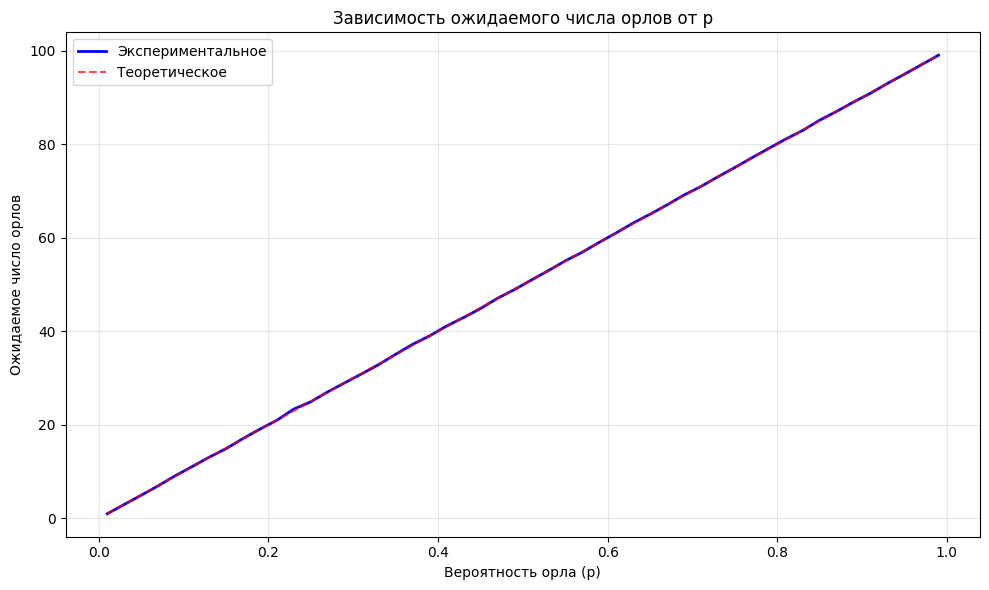

In [112]:

plt.figure(figsize=(10, 6))
plt.plot(pValues, avgHeads, 'b-', linewidth=2, label='Экспериментальное')
theoretical = [100 * p for p in pValues]
plt.plot(pValues, theoretical, 'r--', alpha=0.7, label='Теоретическое')
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Ожидаемое число орлов')
plt.title('Зависимость ожидаемого числа орлов от p')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

График зависимости ширины 95% вероятностного интервала от p

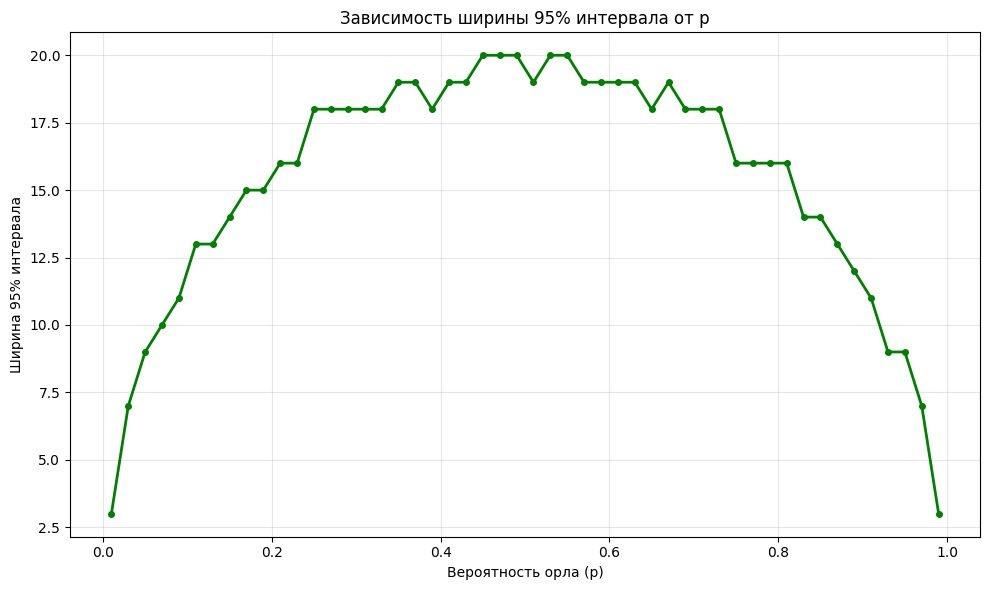

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(pValues, intervalWidths, 'g-o', linewidth=2, markersize=4)
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Ширина 95% интервала')
plt.title('Зависимость ширины 95% интервала от p')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

График зависимости вероятности серии из 5 орлов от p

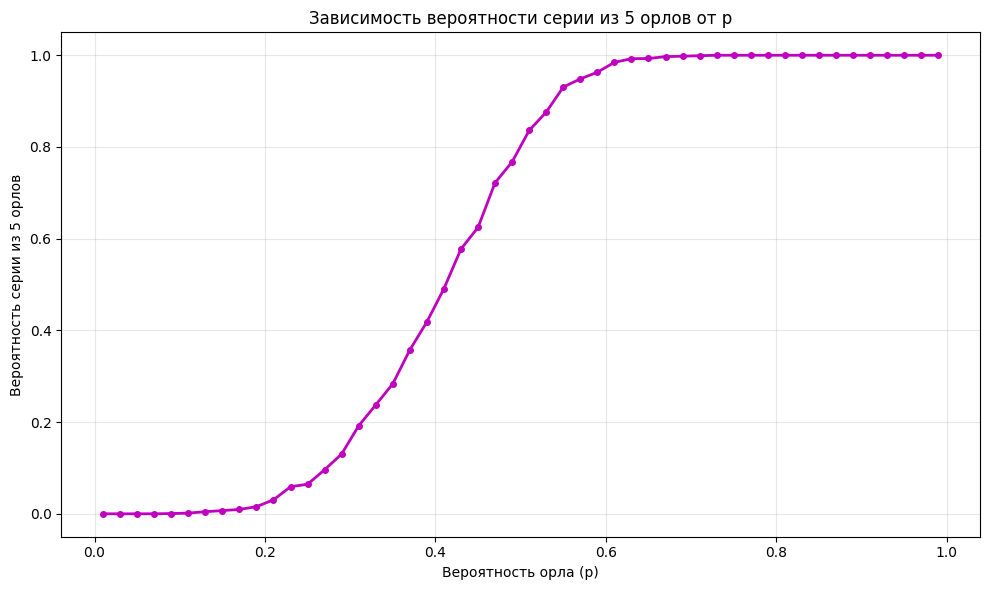

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(pValues, probSeries5_list, 'm-o', linewidth=2, markersize=4)
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Вероятность серии из 5 орлов')
plt.title('Зависимость вероятности серии из 5 орлов от p')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

График зависимости средней длины максимальной серии от p

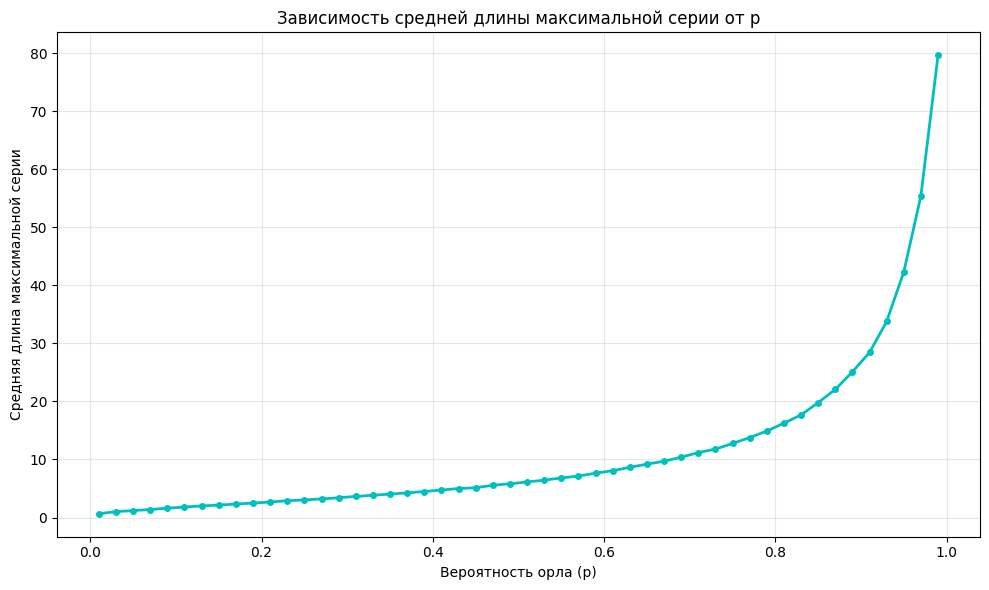

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(pValues, avgMaxSeries_list, 'c-o', linewidth=2, markersize=4)
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Средняя длина максимальной серии')
plt.title('Зависимость средней длины максимальной серии от p')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()